In [1]:
! pip install numpy
! pip install matplotlib
! pip install scikit-learn
! pip install pandas
! pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from PIL import Image

In [3]:
from tensorflow import keras

In [4]:
import os
from PIL import Image

data_dir = 'data'

for root, _, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            with Image.open(file_path) as img:
                img.verify()  # Verify image integrity
        except (IOError, SyntaxError):
            print(f"Removing corrupted file: {file_path}")
            os.remove(file_path)

KeyboardInterrupt: 

In [5]:
def img_processing(image, label):
    image = tf.cast(image/255.,tf.float32)
    return image, label

In [6]:
train = keras.utils.image_dataset_from_directory(
    directory='data', 
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    validation_split = 0.1,
    subset = 'training',
    seed = 1
).map(img_processing).apply(tf.data.experimental.ignore_errors())

validate = keras.utils.image_dataset_from_directory(
    directory='data', 
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    validation_split = 0.1, 
    subset = 'validation',
    seed = 1
).map(img_processing).apply(tf.data.experimental.ignore_errors())

Found 24959 files belonging to 2 classes.
Using 22464 files for training.
Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.
Found 24959 files belonging to 2 classes.
Using 2495 files for validation.


In [7]:
train = train.map(img_processing)
validate = validate.map(img_processing)

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization

In [8]:
model = Sequential()

model.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation=tf.keras.activations.relu,
    input_shape=(256,256,3)
))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides = 2,
))
model.add(Conv2D(
    filters = 64,
    kernel_size = (3,3),
    activation=tf.keras.activations.relu,
))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides = 2,
))
model.add(Conv2D(
    filters = 64,
    kernel_size = (3,3),
    activation=tf.keras.activations.relu,
))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides = 2,
))
model.add(Conv2D(
    filters = 64,
    kernel_size = (3,3),
    activation=tf.keras.activations.relu,
))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides = 2,
))

model.add(Flatten())
model.add(Dense(
    units = 512,
    activation = tf.keras.activations.relu,
))
model.add(BatchNormalization())
model.add(Dense(
    units = 512,
    activation = tf.keras.activations.relu,
))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(
    units = 512,
    activation = tf.keras.activations.relu,
))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(
    units = 1,
    activation = tf.keras.activations.sigmoid
))

d:\fnclick\python\ml\dog-cat-identification\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,048,257 (26.89 MB)

 Trainable params: 7,045,185 (26.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
res = model.fit(train, epochs=10, validation_data = validate)

Epoch 1/10
  5/702 ━━━━━━━━━━━━━━━━━━━━ 5:35 481ms/step - accuracy: 0.5832 - loss: 0.8164

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Input size should match (header_size + row_size * abs_height) but they differ by 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_4619]

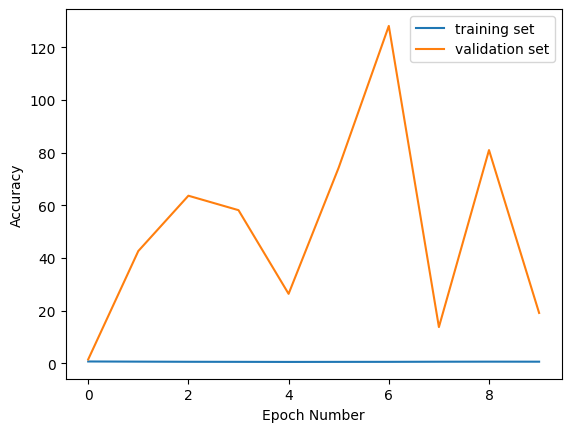

In [13]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(res.history['loss'], label='training set')
plt.plot(res.history['val_loss'], label='validation set')
plt.legend()